# LIAR Dataset
* https://www.politifact.com/
* https://paperswithcode.com/about
* https://paperswithcode.com/paper/liar-liar-pants-on-fire-a-new-benchmark
* https://paperswithcode.com/dataset/liar

_LIAR is a publicly available dataset for fake news detection. A decade-long of 12.8K manually labeled short statements were collected in various contexts from POLITIFACT.COM, which provides detailed analysis report and links to source documents for each case. This dataset can be used for fact-checking research as well. Notably, this new dataset is an order of magnitude larger than previously largest public fake news datasets of similar type. The LIAR dataset4 includes 12.8K human labeled short statements from POLITIFACT.COM’s API, and each statement is evaluated by a POLITIFACT.COM editor for its truthfulness._

In [1]:
for line in open('/kaggle/input/liardataset/README', 'r').readlines():
    print(line.strip('\n'))

LIAR: A BENCHMARK DATASET FOR FAKE NEWS DETECTION

William Yang Wang, "Liar, Liar Pants on Fire": A New Benchmark Dataset for Fake News Detection, to appear in Proceedings of the 55th Annual Meeting of the Association for Computational Linguistics (ACL 2017), short paper, Vancouver, BC, Canada, July 30-August 4, ACL.
Description of the TSV format:

Column 1: the ID of the statement ([ID].json).
Column 2: the label.
Column 3: the statement.
Column 4: the subject(s).
Column 5: the speaker.
Column 6: the speaker's job title.
Column 7: the state info.
Column 8: the party affiliation.
Column 9-13: the total credit history count, including the current statement.
9: barely true counts.
10: false counts.
11: half true counts.
12: mostly true counts.
13: pants on fire counts.
Column 14: the context (venue / location of the speech or statement).

Note that we do not provide the full-text verdict report in this current version of the dataset,
but you can use the following command to access the fu

# Data Ingestion

`pandas` is an open-source python library built for data manipulation and analysis. It is part of the standard library for many teams of data scientists and engineers. Sponsored by [NumFOCUS](https://numfocus.org/), `pandas` is used by academics researchers and private industry for importing and cleansing data, transforming data, creating visualizations, time-series analysis, machine learning, etc... (the list goes on...)

`pandas` introduces new types (e.g. `pandas.DataFrame`, `pandas.Series`) that have special syntax for data manipulation that are not shared with python's builtin types (e.g. `list`, `dict`). Some of the new syntax can look jarring at first, but is _lingua franca_ for many data researchers.



In [2]:
import pandas as pd # https://pandas.pydata.org/

In [3]:
def read_dataframe(tsv_file: str) -> pd.DataFrame:
    
    # creates a "dataframe" or "df" for short. This is similar to a 2-D python dict.
    df = pd.read_csv(tsv_file, delimiter='\t', dtype=object)
    
    # replaces all "null" or "NaN" values with an empty string
    df.fillna("", inplace=True)
    
    # labels the columns in the dataset using the data dictionary described in the README
    df.columns = [
        'id',                # Column 1: the ID of the statement ([ID].json).
        'label',             # Column 2: the label.
        'statement',         # Column 3: the statement.
        'subjects',          # Column 4: the subject(s).
        'speaker',           # Column 5: the speaker.
        'speaker_job_title', # Column 6: the speaker's job title.
        'state_info',        # Column 7: the state info.
        'party_affiliation', # Column 8: the party affiliation.
        
        # Column 9-13: the total credit history count, including the current statement.
        'count_1', # barely true counts.
        'count_2', # false counts.
        'count_3', # half true counts.
        'count_4', # mostly true counts.
        'count_5', # pants on fire counts.
        
        'context' # Column 14: the context (venue / location of the speech or statement).
    ]
    
    return df

#create a dataframe from the training data
df = read_dataframe('/kaggle/input/liardataset/train.tsv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 10239 non-null  object
 1   label              10239 non-null  object
 2   statement          10239 non-null  object
 3   subjects           10239 non-null  object
 4   speaker            10239 non-null  object
 5   speaker_job_title  10239 non-null  object
 6   state_info         10239 non-null  object
 7   party_affiliation  10239 non-null  object
 8   count_1            10239 non-null  object
 9   count_2            10239 non-null  object
 10  count_3            10239 non-null  object
 11  count_4            10239 non-null  object
 12  count_5            10239 non-null  object
 13  context            10239 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [5]:
df.head(10)

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7,19,3,5,44,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15,9,20,19,2,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0,3,2,5,1,a an online opinion-piece
5,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,,Texas,republican,3,1,1,3,1,a press release.
6,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70,71,160,163,9,"a Democratic debate in Philadelphia, Pa."
7,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,,,organization,0,0,1,0,1,a website
8,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0,0,0,1,0,an online video
9,7115.json,mostly-true,"For the first time in history, the share of th...",elections,robert-menendez,U.S. Senator,New Jersey,democrat,1,3,1,3,0,a speech


In [6]:
def print_row(input_df: pd.DataFrame, index: int) -> None:
    """Most relevant columns for today's analysis"""
    print(f"speaker: {input_df.iat[index, 4]}")
    print(f"subject(s): {input_df.iat[index, 3]}")
    print(f"statement: {input_df.iat[index, 2]}")
    print(f"label: {input_df.iat[index, 1]}")

In [7]:
print_row(df, 1)

speaker: barack-obama
subject(s): foreign-policy
statement: Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
label: mostly-true


In [8]:
print_row(df, 10000)

speaker: rick-perry
subject(s): income
statement: A part-time Congress with half the pay would still make $38,000 a year more than the average American family.
label: mostly-true


# Analysing the data
With a `pandas.DataFrame` in hand, we can start asking questions about the data. This is called "Exploratory Data Analysis" (a.k.a. "EDA") and is a critical step in a data scientist's workflow. It is important because we need to understand the nature of our data in order to draw conclusions from it. Some questions we'll answer today, 

* What is the distribution of labels in this data? How many "mostly-true", "half-true", etc? 
* How many distinct subjects are there? Distinct speakers?

<br />

## Label Distribution & "Truthiness"
_These definitions were taken from  [PolitiFact's "truth-o-meter" methodology](https://www.politifact.com/article/2018/feb/12/principles-truth-o-meter-politifacts-methodology-i/#Truth-O-Meter%20ratings) page_

1. **true** – The statement is accurate and there’s nothing significant missing.
2. **mostly-true** – The statement is accurate but needs clarification or additional information.
3. **half-true** – The statement is partially accurate but leaves out important details or takes things out of context.
4. **barely-true** – The statement contains an element of truth but ignores critical facts that would give a different impression.
5. **false** – The statement is not accurate.
6. **pants-fire** – The statement is not accurate and makes a ridiculous claim. a.k.a. "Liar, Liar, Pants on Fire!"

<br />

`pandas` has builtin methods that wrap `matplotlib` visualization libraries. Using these builtin methods, it is fairly straightforward to make charts from a `pandas.DataFrame`.

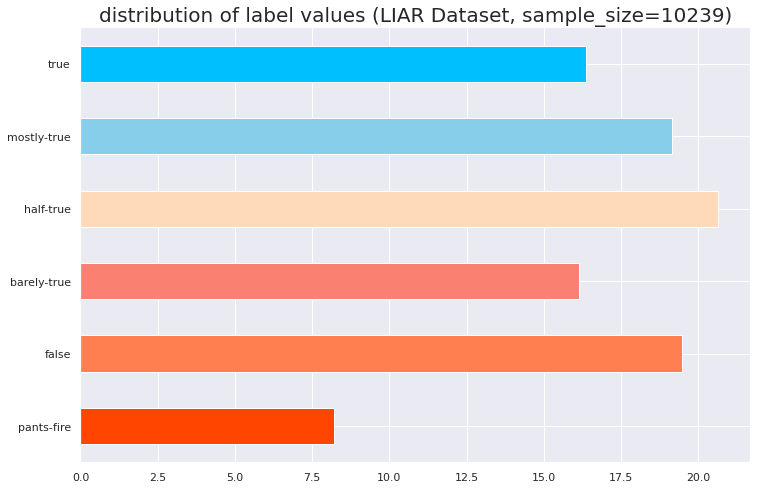

In [9]:
import seaborn as sns # https://seaborn.pydata.org/
sns.set()


def label_bar_chart(input_df: pd.DataFrame, title: str = "LIAR Dataset") -> None:
    
    # computes frequencies of labels and converts to percentages
    label_frequencies = input_df['label'].value_counts(normalize=True)
    
    def multiply_100(x):
        return x * 100
    
    # "apply" is a handy way to call a function on every row of data.
    label_frequencies = label_frequencies.apply(multiply_100)
    
    # bar chart ordering and  colors for readability.
    labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
    colors = [
        'orangered', # pants-fire
        'coral', # false
        'salmon', # barely-true
        'peachpuff', # half-true
        'skyblue', # mostly-true
        'deepskyblue' # true
    ]
    
    label_frequencies = label_frequencies.reindex(index = labels)
    
    
    # creates a horizontal bar chart with a descriptive title
    axis = label_frequencies.plot(kind='barh', figsize=(12, 8), color=colors)
    axis.set_title(f"distribution of label values ({title}, sample_size={len(input_df)})", size=20);
    

# create bar chart over labels for the entire LIAR dataset.
label_bar_chart(df)

<br />

## Speaker Analysis
Let's take a look at the speaker column now. In order for this data to be super useful, we want a large breadth of speakers. Otherwise, the dataset might be too narrow for general applicability. It might also be nice to look at label distribution for a given speaker. 

`pandas` has a lot of builtin methods to help slice and dice datasets. `pandas.Series.nunique()` gives us the number of unique values for a column. We can treat `pandas.DataFrame` like a list and call `len(df)` to get the total number of rows. 


In [10]:
num_unique_speakers = df['speaker'].nunique()
avg_statments = len(df) / num_unique_speakers

print(f"Unique speakers in dataset: {num_unique_speakers}")
print(f"Average statements made per speaker: {avg_statments}")

Unique speakers in dataset: 2910
Average statements made per speaker: 3.5185567010309278


We can filter a `pandas.DataFrame` by specific values. However, it uses non-native python syntax which can look pretty foreign at first, 

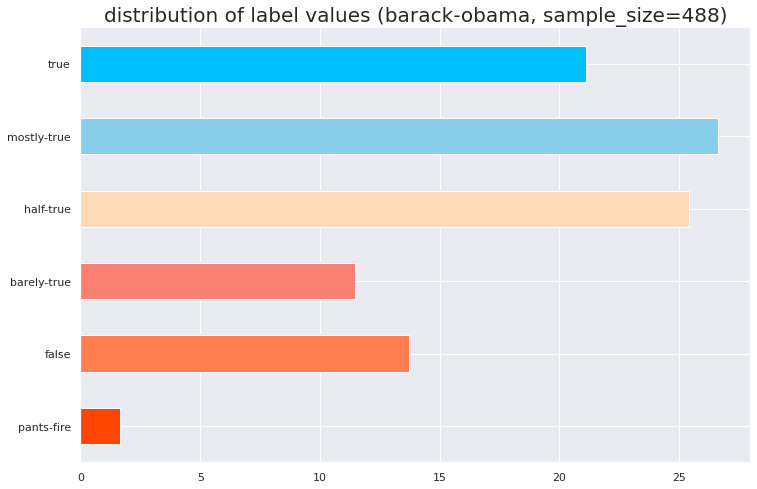

In [11]:
# 'barack-obama', 'bernie-s', 'mitt-romney', 'hillary-clinton', 'tom-cotton', 'north-korea', 'donald-trump', 'joe-biden', 'mitch-mcconnell'
# list(df['speaker'].unique())

def speaker_bar_chart(input_df: pd.DataFrame, speaker: str) -> pd.DataFrame:
    
    # filters the input_df
    speaker_df = input_df[ input_df['speaker'] == speaker ]
    speaker_df.reset_index(inplace=True)
    
    # calls the bar chart function we created earlier
    label_bar_chart(speaker_df, title=speaker)
    
    return speaker_df
    

# create a bar chart over labels for a single speaker. Store the returned dataframe to a variable.
ret_df = speaker_bar_chart(df, 'barack-obama')

In [12]:
# ret_df[ ret_df['label'] == 'pants-fire' ]
# ret_df

In [13]:
# print_row(ret_df, 0)

<br />

## Subject Analysis
Let's do for subjects what we did for speakers. Our `label_bar_chart` function doesn't care how the input data is sliced (as long as it has a "labels" column!), so we can re-use that here. 

**Note**: There can be multiple subjects per row of data, so we'll need to account for that. We need to _transform_ our dataset, using `pandas`, in order to feed it into `label_bar_chart`. 


Handling columns of data that have multiple values is such a common operation in data analysis that there is a builtin function for this: `pandas.DataFrame.explode`!

In [14]:
# this creates a new dataframe that only contains the label and subjects columns.
subject_df = df[['label', 'subjects']].copy()

# # start by turning the comma-separated values into a list of values
def csv_to_list(x):
    return x.split(",")

subject_df['subjects'] = subject_df['subjects'].apply(csv_to_list)

subject_df = subject_df.explode('subjects')

subject_df.head()

,label,subjects
0,half-true,energy
0,half-true,history
0,half-true,job-accomplishments
1,mostly-true,foreign-policy
2,false,health-care


Now we can perform the same analysis on the subject column, 

In [15]:
num_unique_subjects = subject_df['subjects'].nunique()

print(f"Unique subjects in dataset: {num_unique_subjects}")

Unique subjects in dataset: 143


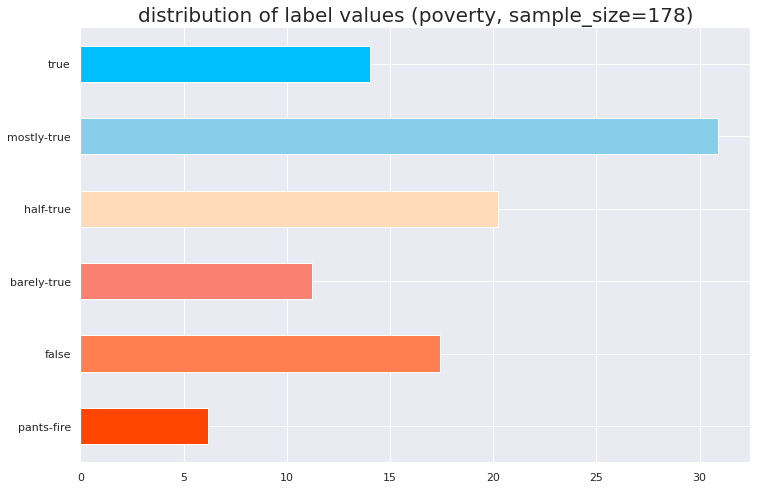

In [16]:
# 'energy', 'poverty', 'taxes', 'climate-change', 'obama-birth-certificate'
# list(subject_df['subjects'].unique())

def subject_bar_chart(input_df: pd.DataFrame, subject: str) -> pd.DataFrame:
    
    # filters the input_df
    ret_df = input_df[ input_df['subjects'] == subject ]
    ret_df.reset_index(inplace=True)
    
    # calls the bar chart function we created earlier
    label_bar_chart(ret_df, title=subject)
    
    return ret_df
    

# create a bar chart over labels for a single subject. Store the returned dataframe to a variable.
ret_df = subject_bar_chart(subject_df, 'poverty')

# Revisiting the Sentiment Analysis Lab
Often, the work of a data scientist takes them beyond analysis and into the realm of "modeling". A "model" is a representation of data that typically helps answer a particular question. You've already encountered modeling this semester in two labs: "Diagnosing Heart Disease" and "Sentiment Analysis". 

In the "Sentiment Analysis" lab, you labeled words and phrases as "Positive", "Negative", or "Unknown" by building a model from a movie reviews dataset. We are going to apply the same modeling technique here to predict **Truthiness**.


In [17]:
df.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7,19,3,5,44,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15,9,20,19,2,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0,3,2,5,1,a an online opinion-piece


In [18]:
from typing import Dict


def score_label(label: str) -> float:
    scores = {
        'true': 2,
        'mostly-true': 1,
        'half-true': 0,
        'barely-true': -1,
        'false': -2,
        'pants-fire': -3
    }
    return scores[label]


def model_speaker_statements(input_df: pd.DataFrame) -> Dict[str, Dict[str, float]]:
    
    tot = {}
    count = {}
    
    # for each row in the input_df
    for _, row in input_df.T.items():
        
        # grab the pertinent information
        speaker = row['speaker']
        score = score_label(row['label'])
        words = row['statement'].lower().split()
        
        # prevents double counting of words
        uniques = []
        
        for word in words:
            # if its a word we've already seen, skip processing
            if word in uniques:
                continue
                    
            uniques.append(word)
            
            if speaker in tot:
                if word in tot[speaker]:
                    tot[speaker][word] += score
                    count[speaker][word] += 1
                else:
                    tot[speaker][word] = score
                    count[speaker][word] = 1
                    
            else:
                tot[speaker] = {}
                tot[speaker][word] = score
                
                count[speaker] = {}
                count[speaker][word] = 1
                
    
    # compute averages and return model
    for speaker in tot:
        for word in tot[speaker]:
            tot[speaker][word] = tot[speaker][word] / count[speaker][word]
            
    return tot


def score_speaker_statement(model: Dict[str, Dict[str, float]], speaker: str, phrase: str) -> float:
        
    idx = 0
    score = 0
    for word in phrase.split():
        word = word.lower()
        
        if word in model[speaker]:
            score += model[speaker][word]
            idx += 1
            
    if not idx:
        return None
    
    return score / idx
                                        

def sentiment_speaker_statement(model: Dict[str, Dict[str, float]], speaker: str, phrase: str) -> str:

    score = score_speaker_statement(model, speaker, phrase)

    if score is None:
        return None
    
    if score <= 0:
        return False
    
    return True

<br />

## Spot Check

Now let's generate our model and test it against some recent statements that are not a part of our training dataset.

In [19]:
from IPython.display import Image

# build a model from the liar dataset
model = model_speaker_statements(df)

Model outcome: True



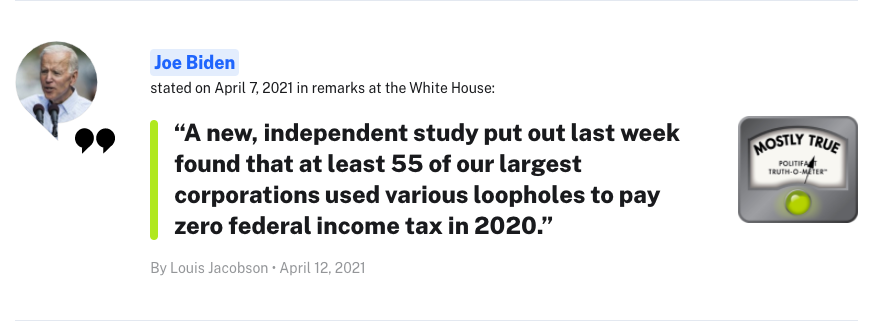

In [20]:
outcome = sentiment_speaker_statement(model, 'joe-biden', "A new, independent study put out last week found that at least 55 of our largest corporations used various loopholes to pay zero federal income tax in 2020.")
print(f"Model outcome: {outcome}\n")

Image("../input/liarscreenshots/Screen Shot 2021-04-18 at 10.27.43 PM.png") # https://www.politifact.com/personalities/joe-biden/

Model outcome: False



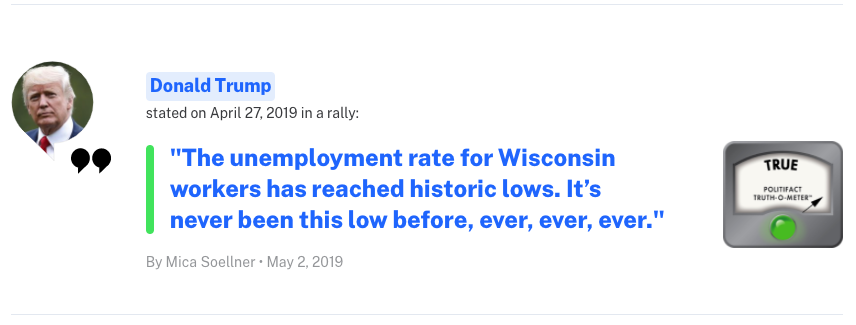

In [21]:
outcome = sentiment_speaker_statement(model, 'donald-trump', "The unemployment rate for Wisconsin workers has reached historic lows. It’s never been this low before, ever, ever, ever.")
print(f"Model outcome: {outcome}\n")

Image("../input/liarscreenshots/Screen Shot 2021-04-18 at 10.56.43 PM.png") # https://www.politifact.com/personalities/donald-trump/

Model outcome: False



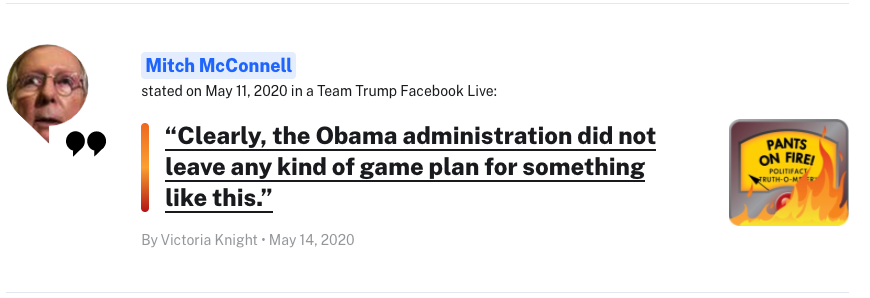

In [22]:
outcome = sentiment_speaker_statement(model, 'mitch-mcconnell', "Clearly, the Obama administration did not leave any kind of game plan for something like this.")
print(f"Model outcome: {outcome}\n")

Image("../input/liarscreenshots/Screen Shot 2021-04-18 at 10.31.34 PM.png") # https://www.politifact.com/personalities/mitch-mcconnell/

Model outcome: True



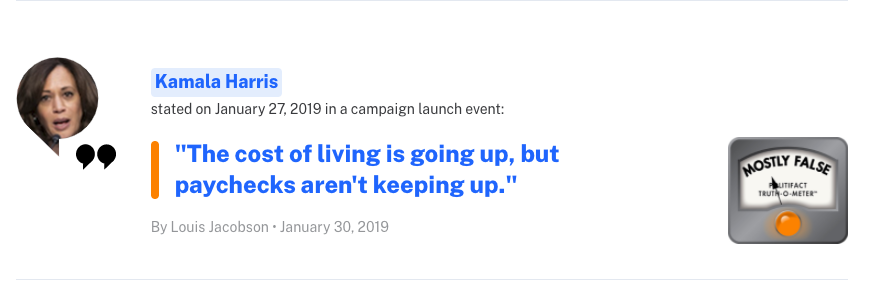

In [23]:
outcome = sentiment_speaker_statement(model, 'kamala-harris', "The cost of living is going up, but paychecks aren't keeping up.")
print(f"Model outcome: {outcome}\n")

Image("../input/liarscreenshots/Screen Shot 2021-04-18 at 11.06.44 PM.png")

Model outcome: True



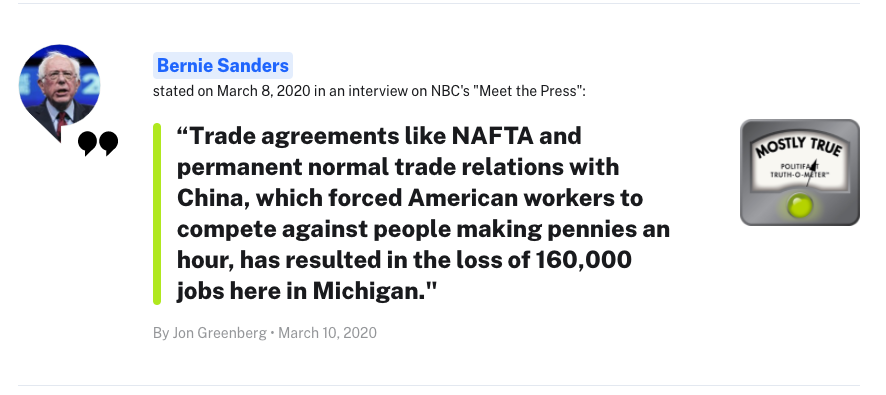

In [24]:
outcome = sentiment_speaker_statement(model, 'bernie-s', "Trade agreements like NAFTA and permanent normal trade relations with China, which forced American workers to compete against people making pennies an hour, has resulted in the loss of 160,000 jobs here in Michigan.")
print(f"Model outcome: {outcome}\n")

Image("../input/liarscreenshots/Screen Shot 2021-04-18 at 11.08.40 PM.png")

## Exporting our model

In [25]:
import json

with open('/kaggle/working/model.json', 'w') as fp:
    json.dump(model, fp)